# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Load the train dataset

In [2]:
cc_data = pd.read_csv('../raw_data/fraudTrain.csv', index_col=0)

In [3]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [4]:
cc_data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
cc_data.shape

(1296675, 22)

# Drop irrelevant columns

In [6]:
drop_columns = ['trans_num', 'unix_time']

In [7]:
cc_data = cc_data.drop(drop_columns, axis = 1)

In [8]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

# Establish new dfs for fraudulent transactions and valid transactions

In [9]:
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [10]:
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 2449 to 1295733
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  7506 non-null   object 
 1   cc_num                 7506 non-null   int64  
 2   merchant               7506 non-null   object 
 3   category               7506 non-null   object 
 4   amt                    7506 non-null   float64
 5   first                  7506 non-null   object 
 6   last                   7506 non-null   object 
 7   gender                 7506 non-null   object 
 8   street                 7506 non-null   object 
 9   city                   7506 non-null   object 
 10  state                  7506 non-null   object 
 11  zip                    7506 non-null   int64  
 12  lat                    7506 non-null   float64
 13  long                   7506 non-null   float64
 14  city_pop               7506 non-null   int64  
 15

In [11]:
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289169 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1289169 non-null  object 
 1   cc_num                 1289169 non-null  int64  
 2   merchant               1289169 non-null  object 
 3   category               1289169 non-null  object 
 4   amt                    1289169 non-null  float64
 5   first                  1289169 non-null  object 
 6   last                   1289169 non-null  object 
 7   gender                 1289169 non-null  object 
 8   street                 1289169 non-null  object 
 9   city                   1289169 non-null  object 
 10  state                  1289169 non-null  object 
 11  zip                    1289169 non-null  int64  
 12  lat                    1289169 non-null  float64
 13  long                   1289169 non-null  float64
 14  city_pop          

### Initial observations:
- No missing values
- 1,296,675 transactions in total
    - 1,289,169 valid transactions
    - 7,506 fraudulent transactions

Text(0.5, 1.0, 'Distribution of fraudulent and valid transactions')

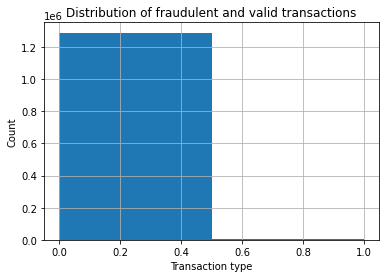

In [12]:
cc_data.is_fraud.hist(bins = 2)
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.title('Distribution of fraudulent and valid transactions')

In [13]:
valid_pct = (len(cc_data_valid)/len(cc_data))*100
fraud_pct = (len(cc_data_fraud)/len(cc_data))*100
print('The percentage of valid transactions is {}% and the percentage of fraud transactions is {}%'.format(valid_pct, fraud_pct))

The percentage of valid transactions is 99.42113482561166% and the percentage of fraud transactions is 0.5788651743883394%


# Examining how many unique transaction categories there are

In [14]:
cc_data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [15]:
cc_data['category'].nunique()

14

In [16]:
cc_data['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

Text(0.5, 1.0, 'Bar Graph of Transaction Categories')

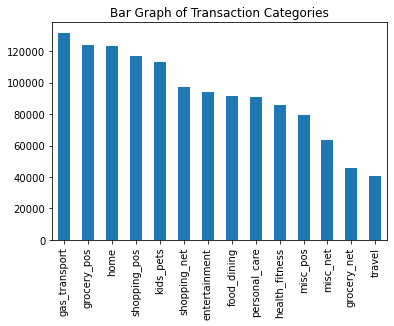

In [17]:
cc_data['category'].value_counts().plot(kind='bar')
plt.title('Bar Graph of Transaction Categories')

Text(0.5, 1.0, 'Bar Graph of VALID Transaction Categories')

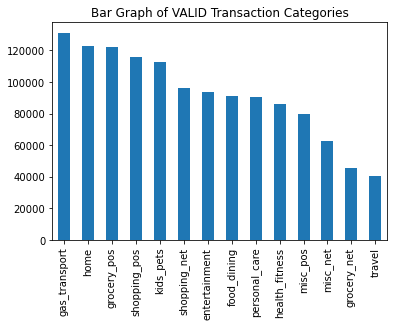

In [18]:
cc_data_valid['category'].value_counts().plot(kind='bar')
plt.title('Bar Graph of VALID Transaction Categories')

Text(0.5, 1.0, 'Bar Graph of FRAUD Transaction Categories')

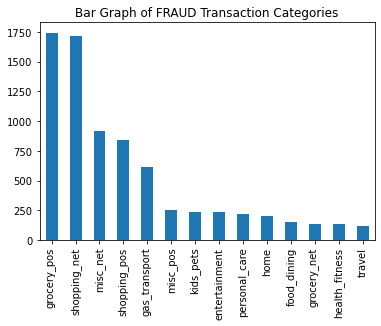

In [19]:
cc_data_fraud['category'].value_counts().plot(kind='bar')
plt.title('Bar Graph of FRAUD Transaction Categories')

Most fraudulent transactions seem to be:
- grocery_pos
- shopping_net
- misc_net
- shopping_pos
- gas_transport

# Examining job column

In [20]:
cc_data['job'].value_counts()

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64

In [21]:
cc_data['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [22]:
# Top jobs for valid transactions:
cc_data_valid['job'].value_counts()

Film/video editor                        9735
Exhibition designer                      9148
Naval architect                          8631
Surveyor, land/geomatics                 8630
Designer, ceramics/pottery               8213
                                         ... 
Writer                                    489
English as a foreign language teacher     487
Producer, television/film/video           485
Hydrogeologist                            485
Engineer, structural                      481
Name: job, Length: 475, dtype: int64

In [23]:
# Top jobs for fraudulent transactions:
cc_data_fraud['job'].value_counts()

Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: job, Length: 443, dtype: int64

Something to consider: Is it worth creating categories for jobs?

# Examine amt column

Text(0.5, 1.0, 'Distribution of transaction amounts')

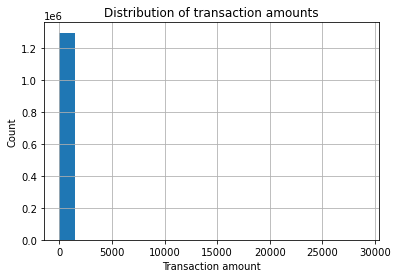

In [24]:
cc_data['amt'].hist(bins = 20)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of transaction amounts')

In [25]:
cc_data['amt'].max()

28948.9

Is the transaction with amount 28,948.90 a mistake, or an outlier that can be removed?

In [26]:
#Find the row with transaction 28,948.90
cc_data.loc[cc_data['amt']==28948.9]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
787549,2019-12-01 16:19:23,4979422371139333,fraud_Satterfield-Lowe,travel,28948.9,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,NE,68881,41.4193,-99.3844,73,Product designer,1935-02-10,42.317313,-99.139498,0


Text(0.5, 1.0, 'Distribution of VALID transaction amounts')

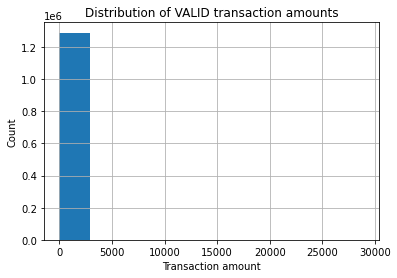

In [27]:
cc_data_valid['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of VALID transaction amounts')

Text(0.5, 1.0, 'Distribution of FRAUD transaction amounts')

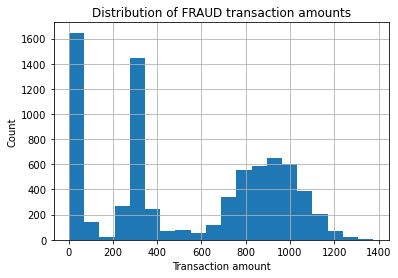

In [28]:
cc_data_fraud['amt'].hist(bins = 20)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of FRAUD transaction amounts')

### Check for number of outliers within valid transactions at different thresholds

In [29]:
#Establish total number of valid transactions
total_valid = len(cc_data_valid)
total_valid

1289169

In [30]:
#Number of valid transactions >= $25,000
num_grtr_25000 = len(cc_data_valid[cc_data_valid['amt']>=25000])
print('There are {} valid transactions out of {} that are greater than or equal to $25000'.format(num_grtr_25000, total_valid))

There are 5 valid transactions out of 1289169 that are greater than or equal to $25000


In [31]:
#Number of valid transactions >= $20,000
num_grtr_20000 = len(cc_data_valid[cc_data_valid['amt']>=20000])
print('There are {} valid transactions out of {} that are greater than or equal to $20000'.format(num_grtr_20000, total_valid))

There are 5 valid transactions out of 1289169 that are greater than or equal to $20000


In [32]:
#Number of valid transactions >= $15,000
num_grtr_15000 = len(cc_data_valid[cc_data_valid['amt']>=15000])
print('There are {} valid transactions out of {} that are greater than or equal to $15000'.format(num_grtr_15000, total_valid))

There are 9 valid transactions out of 1289169 that are greater than or equal to $15000


In [33]:
#Number of valid transactions >= $10,000
num_grtr_10000 = len(cc_data_valid[cc_data_valid['amt']>=10000])
print('There are {} valid transactions out of {} that are greater than or equal to $10000'.format(num_grtr_10000, total_valid))

There are 34 valid transactions out of 1289169 that are greater than or equal to $10000


In [34]:
#Number of valid transactions >= $5,000
num_grtr_5000 = len(cc_data_valid[cc_data_valid['amt']>=5000])
print('There are {} valid transactions out of {} that are greater than or equal to $5000'.format(num_grtr_5000, total_valid))

There are 136 valid transactions out of 1289169 that are greater than or equal to $5000


In [35]:
#Look at transactions that are >= $10,000
cc_data_valid[cc_data_valid['amt']>=10000]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
17743,2019-01-11 16:37:15,343472729187663,"fraud_Schroeder, Wolff and Hermiston",travel,11872.21,Gloria,Wallace,F,234 Bridges Wells Apt. 389,Center Tuftonboro,NH,3816,43.6849,-71.2551,1368,"Optician, dispensing",1971-08-05,43.235621,-71.391741,0
37315,2019-01-22 15:24:15,2264937662466770,"fraud_Ritchie, Bradtke and Stiedemann",travel,10776.59,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,1995-10-17,29.772325,-98.593405,0
59564,2019-02-04 21:22:30,30235268718158,"fraud_Champlin, Rolfson and Connelly",travel,12788.07,Kenneth,Doyle,M,8614 Reed Glen,West Harrison,NY,10604,41.0592,-73.7395,11250,Lexicographer,1977-08-16,40.269472,-73.482064,0
105732,2019-03-02 15:36:36,4633065159406313,"fraud_Champlin, Rolfson and Connelly",travel,11629.34,Jasmine,Wade,F,90662 Lewis Avenue,Providence,RI,2908,41.8383,-71.4377,203571,"Nurse, children's",1995-11-29,42.504489,-71.379189,0
150564,2019-03-22 13:17:34,4450831335606294,"fraud_Larson, Quitzon and Spencer",travel,15034.18,Donna,Davis,F,6760 Donovan Lakes,Clayton,OK,74536,34.5906,-95.3800,1760,Occupational psychologist,1972-01-20,35.266488,-95.033506,0
159575,2019-03-25 17:38:55,372509258176510,fraud_Tillman LLC,travel,10469.09,Kristen,Hanson,F,26544 Andrea Glen,Goodrich,MI,48438,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,42.192907,-84.094660,0
164881,2019-03-28 16:53:47,630451534402,fraud_Ankunding-Carroll,travel,14630.68,Rachel,Daniels,F,561 Little Plain Apt. 738,Wetmore,MI,49895,46.3535,-86.6345,765,Immunologist,1972-06-12,46.944452,-85.746696,0
187885,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,Gina,Grimes,F,444 Robert Mews,Clarks Mills,PA,16114,41.3851,-80.1752,606,Energy manager,1997-09-22,41.361042,-79.665772,0
232174,2019-04-27 13:27:50,4003989662068504,"fraud_Reichel, Bradtke and Blanda",travel,10525.07,Chris,White,M,98897 Bennett Lodge,Bessemer,AL,35022,33.3224,-86.9657,71463,Radio broadcast assistant,1989-02-08,32.565170,-86.935466,0
315542,2019-06-01 13:59:46,4502539526809429801,fraud_Lynch-Mohr,travel,13536.84,Stephanie,Cummings,F,1025 Robin Square,Ash Flat,AR,72513,36.2201,-91.6421,2856,Hydrologist,1926-08-27,36.236003,-91.615941,0


Seems like all extreme valid transactions are in the travel category. For FRAUDULENT transactions, the 'travel' category has the least number of cases, so we can probably remove some of these outliers from the valid transactions dataframe.

In [36]:
#Take a quick look at all FRAUDULENT TRAVEL RELATED transactions
#Look at transactions that are >= $15,000
cc_data_fraud[cc_data_fraud['category']=='travel']

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
4693,2019-01-03 22:58:44,4922710831011201,fraud_Mosciski Group,travel,4.50,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,39.492341,-78.859114,1
15472,2019-01-09 22:23:50,342035762534413,fraud_Treutel-King,travel,10.53,Jennifer,Carrillo,F,334 Adam Mountains Apt. 868,Manquin,VA,23106,37.7184,-77.1860,976,"Engineer, automotive",1999-06-19,37.988194,-77.332289,1
15508,2019-01-09 22:58:24,4806443445305,fraud_Boyer-Haley,travel,9.91,Eric,Patel,M,69459 Rachel Prairie Apt. 850,Ironton,OH,45638,38.5294,-82.6654,21635,Geochemist,2001-07-10,39.080891,-83.365176,1
24097,2019-01-14 23:36:30,180031190491743,fraud_Fritsch LLC,travel,10.20,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,31.648465,-88.117149,1
26270,2019-01-15 22:05:57,3595192916105588,fraud_Kovacek Ltd,travel,10.29,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.0080,238602,"Scientist, research (maths)",1993-05-14,35.102385,-79.953349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235111,2020-05-30 19:57:07,4841313716651064,"fraud_Kunze, Larkin and Mayert",travel,9.23,Omar,Gay,M,2161 Blankenship Freeway,West Hartford,VT,5084,43.7185,-72.4439,140,"Development worker, community",1989-10-28,44.215232,-71.477553,1
1261421,2020-06-08 16:59:00,3562793934111141,"fraud_McLaughlin, Armstrong and Koepp",travel,11.12,Meagan,Edwards,F,10376 Bullock Rapid,Queen Anne,MD,21657,38.9456,-75.9777,777,Television production assistant,1997-04-17,38.079395,-76.176270,1
1262318,2020-06-08 21:02:08,676372984911,fraud_Boyer-Haley,travel,10.33,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,KS,66941,39.7562,-98.4462,242,Tourism officer,1987-07-18,39.647883,-99.273257,1
1262873,2020-06-08 23:41:38,4681601008538160,"fraud_Hahn, Douglas and Schowalter",travel,9.34,Tammy,Davis,F,77663 Colleen Freeway,Moundsville,WV,26041,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,39.892369,-81.004168,1


Text(0.5, 1.0, 'Distribution of Fraudulent Travel Transaction Amounts')

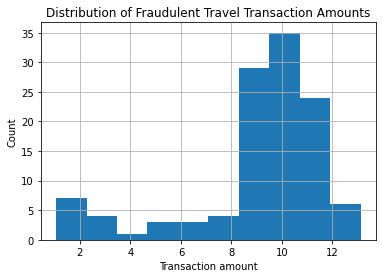

In [37]:
#Get a distribution of fraudulent transaction amounts that are travel related.
cc_data_fraud[cc_data_fraud['category']=='travel']['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Travel Transaction Amounts')

Since all the fraudulent transactions that are TRAVEL related are under $13, we can probably remove a fair number of our travel related outliers from the valid transactions data frame.

In [38]:
#How many VALID, TRAVEL transactions are there under $5000?
num_less_5000 = len(cc_data_valid[(cc_data_valid['amt']<5000) & (cc_data_valid['category']=='travel')])
print('There are {} valid travel transactions that are less than $5000'.format(num_less_5000))

There are 40285 valid travel transactions that are less than $5000


Text(0.5, 1.0, 'Distribution of Valid Travel Transaction Amounts')

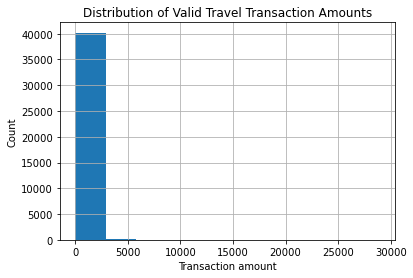

In [39]:
#Get a histogram of VALID, TRAVEL, transactions
cc_data_valid[cc_data_valid['category']=='travel']['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Valid Travel Transaction Amounts')

Text(0.5, 1.0, 'Distribution of Valid Travel Transaction Amounts Greater than $5000')

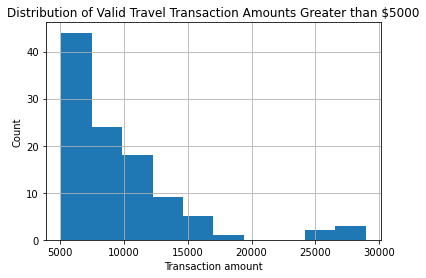

In [40]:
#Get a histogram of VALID, TRAVEL, transactions that are greater than or equal to $5000
cc_data_valid[(cc_data_valid['category']=='travel') & (cc_data_valid['amt'] >= 5000)]['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Valid Travel Transaction Amounts Greater than $5000')

Text(0.5, 1.0, 'Distribution of Valid Travel Transaction Amounts Less than $5000')

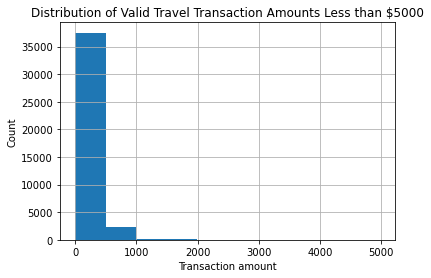

In [41]:
#Get a histogram of VALID, TRAVEL, transactions that are less than $5000
cc_data_valid[(cc_data_valid['category']=='travel') & (cc_data_valid['amt'] < 5000)]['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Valid Travel Transaction Amounts Less than $5000')

Check if all valid travel transactions >= $5000 are travel related

In [42]:
cc_data_valid[cc_data_valid['amt']>=5000]['category'].value_counts()

travel          106
shopping_pos     15
shopping_net     15
Name: category, dtype: int64

We'll use $5000 as the threshold for removing outliers, provided that they are travel related expenses. Will keep shopping_net and shopping_pos outliers since there are a fair number of fraudulent transactions under these categories.

In [43]:
cc_data = cc_data.drop(cc_data[(cc_data.amt >= 5000) & (cc_data.category == 'travel')].index)

Text(0.5, 1.0, 'Distribution of transaction amounts')

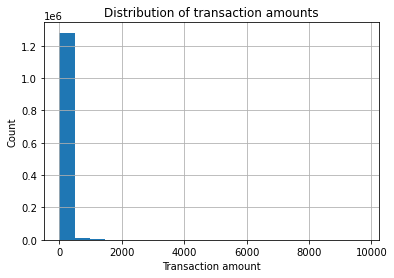

In [44]:
#check histogram of transaction amounts for whole dataset
cc_data['amt'].hist(bins = 20)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of transaction amounts')

In [45]:
#check for travel transactions >=$5000
cc_data[(cc_data['category']=='travel') & (cc_data['amt']>=5000)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud


In [46]:
#Reassign fraudulent dataframe and valid dataframe
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

# Examine gender column

In [47]:
cc_data['gender'].value_counts()

F    709805
M    586764
Name: gender, dtype: int64

Text(0.5, 1.0, 'Transaction count by gender (all transactions)')

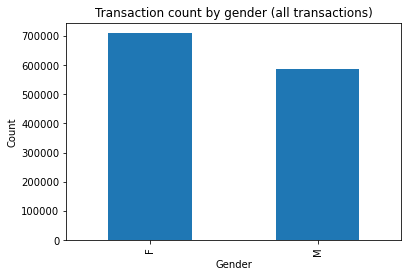

In [48]:
cc_data['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction count by gender (all transactions)')

Text(0.5, 1.0, 'Transaction count by gender (VALID transactions only)')

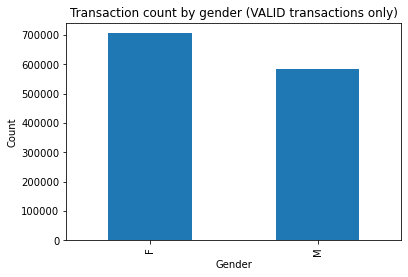

In [49]:
cc_data_valid['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction count by gender (VALID transactions only)')

Text(0.5, 1.0, 'Transaction count by gender (FRAUD transactions only)')

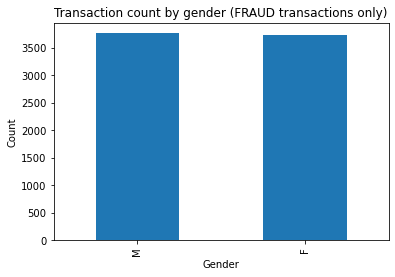

In [50]:
cc_data_fraud['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction count by gender (FRAUD transactions only)')

# Convert trans_date_trans_time and dob columns into datetime

In [51]:
cc_data['trans_date_trans_time']=pd.to_datetime(cc_data['trans_date_trans_time'])

In [52]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296569 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296569 non-null  datetime64[ns]
 1   cc_num                 1296569 non-null  int64         
 2   merchant               1296569 non-null  object        
 3   category               1296569 non-null  object        
 4   amt                    1296569 non-null  float64       
 5   first                  1296569 non-null  object        
 6   last                   1296569 non-null  object        
 7   gender                 1296569 non-null  object        
 8   street                 1296569 non-null  object        
 9   city                   1296569 non-null  object        
 10  state                  1296569 non-null  object        
 11  zip                    1296569 non-null  int64         
 12  lat                    12965

In [53]:
cc_data['trans_date_trans_time'].max()

Timestamp('2020-06-21 12:13:37')

In [54]:
cc_data['trans_date_trans_time'].min()

Timestamp('2019-01-01 00:00:18')

In [55]:
cc_data['dob']=pd.to_datetime(cc_data['dob'])

In [56]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296569 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296569 non-null  datetime64[ns]
 1   cc_num                 1296569 non-null  int64         
 2   merchant               1296569 non-null  object        
 3   category               1296569 non-null  object        
 4   amt                    1296569 non-null  float64       
 5   first                  1296569 non-null  object        
 6   last                   1296569 non-null  object        
 7   gender                 1296569 non-null  object        
 8   street                 1296569 non-null  object        
 9   city                   1296569 non-null  object        
 10  state                  1296569 non-null  object        
 11  zip                    1296569 non-null  int64         
 12  lat                    12965

In [57]:
cc_data['dob'].max()

Timestamp('2005-01-29 00:00:00')

In [58]:
cc_data['dob'].min()

Timestamp('1924-10-30 00:00:00')

In [59]:
cc_data['dob'] = cc_data['dob'].dt.date

In [60]:
cc_data['dob'].max()

datetime.date(2005, 1, 29)

# Examine state column

In [61]:
cc_data['state'].value_counts()

TX    94862
NY    83492
PA    79843
CA    56355
OH    46476
MI    46151
IL    43251
FL    42666
AL    40987
MO    38399
MN    31711
AR    31125
NC    30264
WI    29365
VA    29246
SC    29188
KY    28475
IN    27578
IA    26982
OK    26668
MD    26190
GA    26062
WV    25689
NJ    24602
NE    24164
KS    22996
MS    21185
LA    20963
WY    19320
WA    18923
OR    18596
TN    17554
ME    16505
NM    16405
ND    14786
CO    13879
MA    12375
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8275
CT     7700
NV     5607
ID     5545
DC     3612
HI     2559
AK     2120
RI      549
DE        9
Name: state, dtype: int64

In [62]:
# Checking state count for VALID transactions
cc_data_valid['state'].value_counts()

TX    94383
NY    82937
PA    79385
CA    56029
OH    46155
MI    45913
IL    43003
FL    42385
AL    40772
MO    38208
MN    31504
AR    30964
NC    30115
WI    29202
VA    29048
SC    28995
KY    28320
IN    27436
IA    26840
OK    26525
MD    26033
GA    25916
WV    25543
NJ    24484
NE    23984
KS    22840
MS    21070
LA    20872
WY    19210
WA    18827
OR    18447
TN    17414
ME    16386
NM    16323
ND    14729
CO    13766
MA    12306
SD    12250
MT    11722
VT    11696
AZ    10733
UT    10638
NH     8216
CT     7684
NV     5560
ID     5534
DC     3591
HI     2552
AK     2084
RI      534
Name: state, dtype: int64

In [63]:
# Checking state count for FRAUD transactions
cc_data_fraud['state'].value_counts()

NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
VA    198
SC    193
MO    191
NE    180
WI    163
AR    161
MD    157
KS    156
KY    155
OR    149
NC    149
GA    146
WV    146
OK    143
IA    142
IN    142
TN    140
ME    119
NJ    118
MS    115
CO    113
WY    110
WA     96
LA     91
NM     82
SD     74
VT     72
MA     69
UT     61
NH     59
ND     57
NV     47
AZ     37
AK     36
MT     32
DC     21
CT     16
RI     15
ID     11
DE      9
HI      7
Name: state, dtype: int64

<b>Questions: </b> 
1. Given the number of different states, is it worth creating binary columns for each state? (such as: is_Texas, is_NY, etc)?
2. Would it make sense to get another dataset on state populations and merge with cc_data?

<AxesSubplot:>

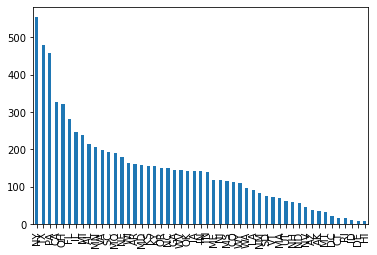

In [64]:
#Create viz for fraud transactions by state:
cc_data_fraud['state'].value_counts().plot(kind='bar')

# Save cleaned dataframe

In [65]:
#save the data to a new csv file
cc_data.to_csv('../raw_data/fraudTrain_cleaned.csv')